### A Brief History
Elliptic&ndash;curve mathematics predates its applications in public&ndash;key cryptography. In 1985, the mathematicians Neal Koblitz and Victor S. Miller suggested that elliptic curves over finite fields were analogous&mdash;and perhaps even superior&mdash;to the multiplicative&ndash;group implementations of the *discrete logarithm problem* (DLP) used in the key&ndash;exchange protocol introduced by Diffie and Hellman in their famous 1976 paper, and further applied to other cryptographic schemes by ElGamal et al.

The DLP is the *one-way function* at the heart of Diffie&ndash;Hellman style key agreement protocols, and elliptic&ndash;curve implementations of it (known as *ECDLP*) have largely overtaken multiplicative&ndash;group implementations due to the former's superior performance and security characteristics.

### An Elliptic Curve Over the Real Numbers
They say a picture is worth a thousand words. So it is very helpful to see what at an ellipctic curve actually looks like before discussing its use in cryptography. Using Python's rich math and visualization libraries *NumPy* and *Matplotlib*, we can plot an elliptic curve over the real numbers.

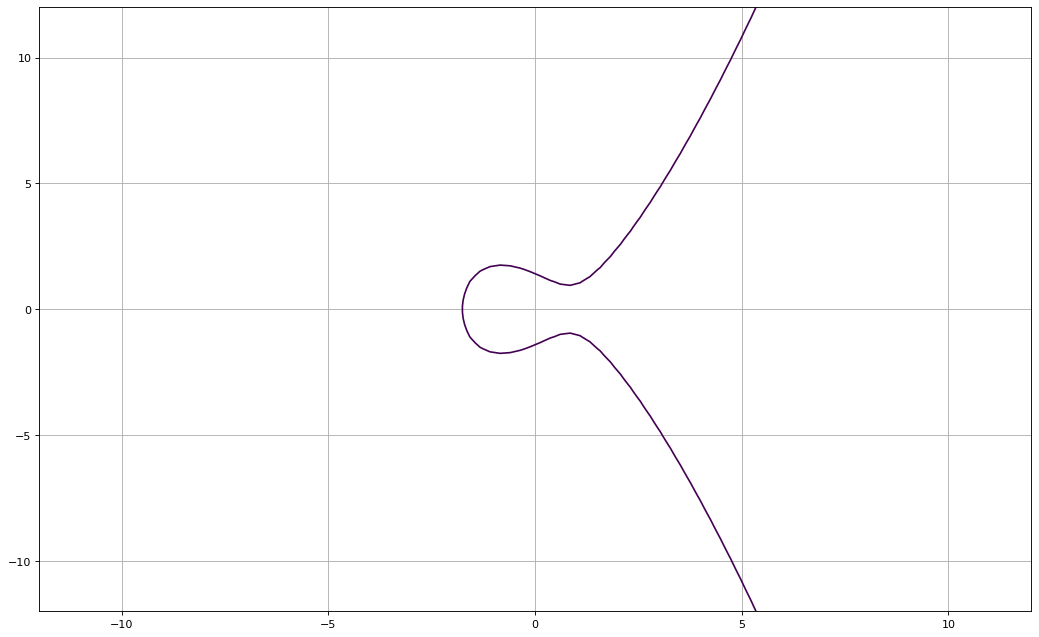

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10), dpi=80)

y, x = np.ogrid[-12:12:100j, -12:12:100j]
a, b = -2, 2
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

plt.grid()
plt.show()

The elliptic curves used in public&ndash;key cryptography are over finite (integer) fields, but graphing curves over finite fields is not particularly  compelling visually. Graphing them over the real numbers, however, serves as an excellent mental model for understanding ellipctic curve cryptography (*real* numbers can have fractional components, whereas integers cannot).

Algebraically, this curve is defined by the equation *`y`<sup>`2`</sup>` = x`<sup>`3`</sup>` + ax + b`*, where `a` and `b` are constant coeffients that influence the shape of the curve (in the curve above, `a = -2` and `b = 2`), and `x` and `y` are coordinate pairs that define the curve.

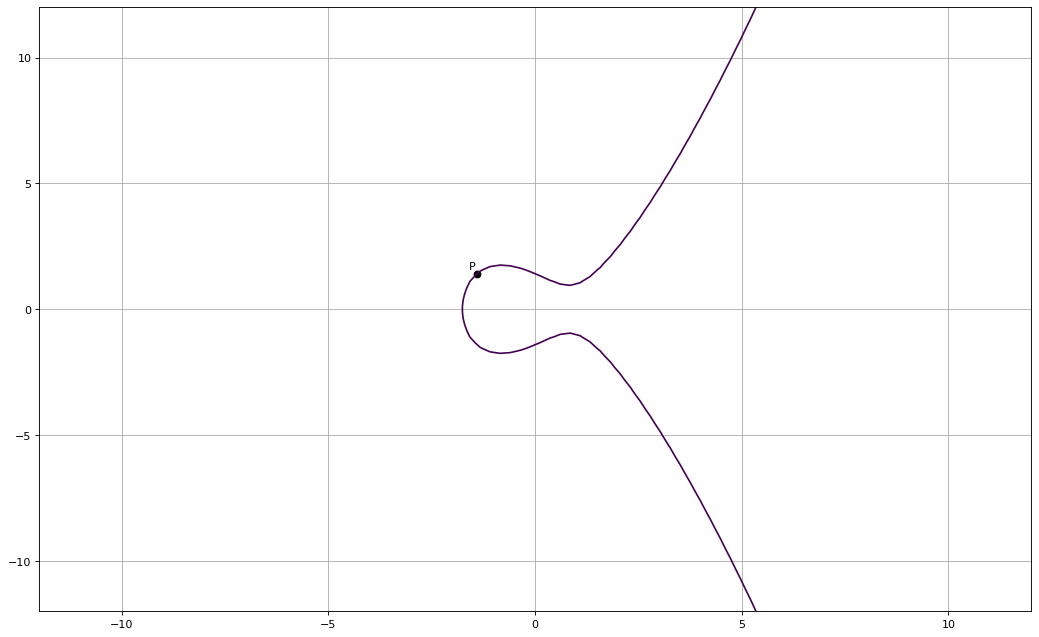

In [2]:
plt.figure(figsize=(16,10), dpi=80)

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

Px, Py = -1.4029, 1.4052
plt.scatter(Px, Py, color="black")
plt.annotate("P", [Px-.2, Py+.2])

plt.grid()
plt.show()

### The Base Point
Here we plot a single point `P` on the curve at the coordinates `(-1.4028, 1.4052)`. Let's call `P` the *base point*, or *generator* (recall that the generator in a multiplicative group is its *primitive element*; i.e., the element that when raised to consecutive powers *generates* every other element in the group). The base point on an elliptic curve is analagous to the generator, or primitive element, in a multiplicative&ndash;group.

### Elliptic Curve Point Addition
It is possible to *add* two points on an elliptic curve. The result of this addition is a third point on the curve.

To add two distinct points `P` and `Q` on a curve, you draw a straight line between them. This line will (almost) always intersect the curve at a third point (the exception is where the x coordinates of `P` and `Q` are the same). This 3<sup>rd</sup> point of intersection is called `-R`, which is the *additive inverse* of `P + Q`. To find the sum, you draw a vertical line through `-R`, and the point where this line intersects the curve is called `R`, which gives us `P + Q = R`.

If this seems confusing, it is; but the image below should make it more clear.

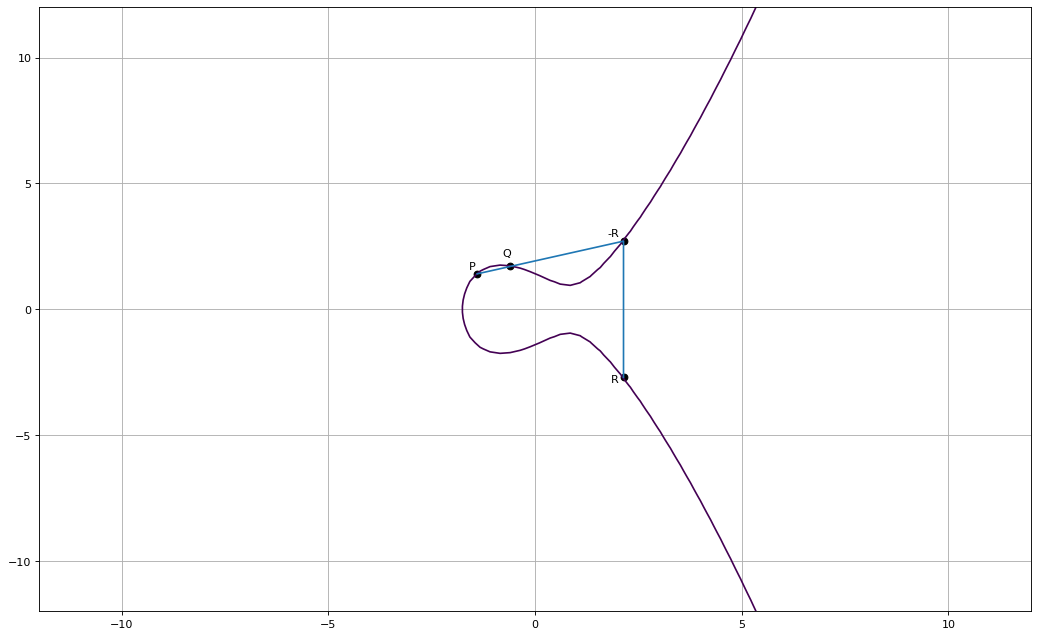

In [3]:
plt.figure(figsize=(16,10), dpi=80)

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

plt.scatter(Px, Py, color="black")
plt.annotate("P", [Px-.2, Py+.2])

Qx, Qy = -.6, 1.7
plt.scatter(Qx, Qy, color="black")
plt.annotate("Q", [Qx-.2, Qy+.4])

def add(x1, y1, x2, y2):
    slope = (y2 - y1) / (x2 - x1)
    x3 = pow(slope, 2) - (x2 + x1)
    y3 = (slope * x2) - (slope * x3) - y2
    return x3, y3

Rx, Ry = add(Px, Py, Qx, Qy)
plt.scatter(Rx, -Ry, color="black")
plt.annotate("-R", [Rx-.4, -Ry+.2])
plt.scatter(Rx, Ry, color="black")
plt.annotate("R", [Rx-.3, Ry-.2])

plt.plot([Px,Qx,Rx,Rx], [Py,Qy,-Ry,Ry])

plt.grid()
plt.show()

Here, the point `R` is the sum of the points `P` and `Q` on the elliptic curve (and `-R` its additive inverse).

### Adding a Point to Itself
So far, we've added two *distinct* points `P` and `Q` to get a third point `R`. But in a cryptographic implementation, we are given just a single starting point; the base point `P`.

To generate a second point (and all subsequent points on the curve) from a single base point, we add the base point to *itself* (as in `P + P`). This is done by drawing a straight line where the base point `P` is *tangent* to the curve and finding the point of intersection, just like we did when we added `P + Q`.

### Doubling a Point
Another way of saying that you are *adding a point to itself* is that you are *doubling* a point (as in `2P`); a distinction that will become important later in the discussion.

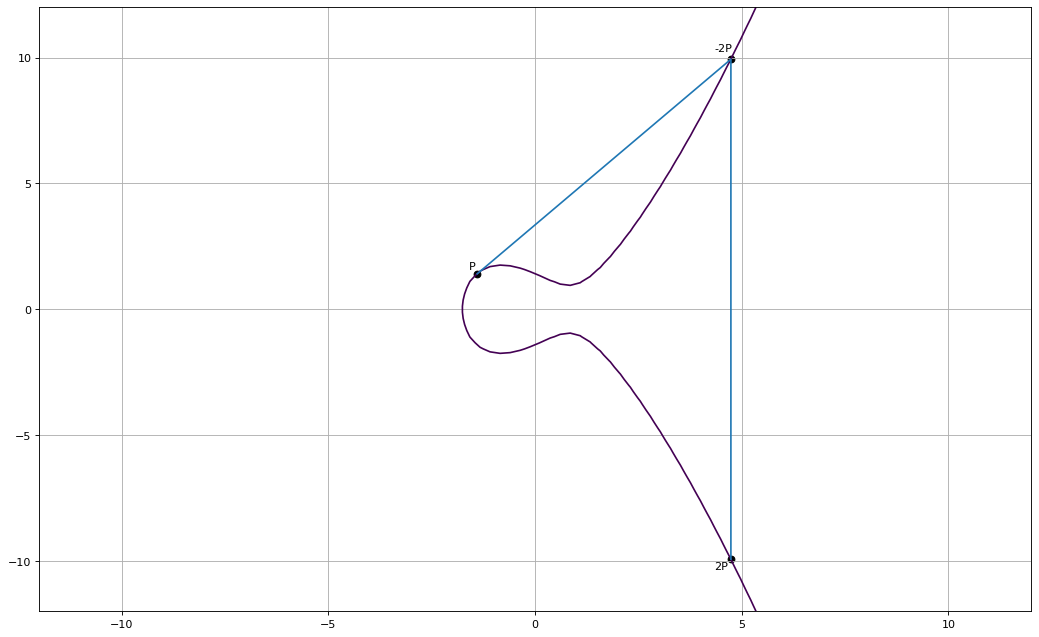

In [4]:
plt.figure(figsize=(16,10), dpi=80)

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

plt.scatter(Px, Py, color="black")
plt.annotate("P", [Px-.2, Py+.2])

def double(x, y, a):
    slope = ((3 * pow(x, 2)) + a) / (2 * y)
    x1 = pow(slope, 2) - 2 * x
    y1 = (slope * (x - x1)) - y
    return x1, y1

P2x, P2y = double(Px, Py, a)

plt.scatter(P2x, -P2y, color="black")
plt.annotate("-2P", [P2x-.4, -P2y+.3])
plt.scatter(P2x, P2y, color="black")
plt.annotate("2P", [P2x-.4, P2y-.4])

plt.plot([Px,P2x,P2x], [Py,-P2y,P2y])

plt.grid()
plt.show()

Here, we've added `P` to itself, or *doubled* `P`. Again, to double the base point `P` (or any point for that matter), you draw a line tangent to the curve at `P`, find the point of intersection with the curve (`-2P`), and take its additive inverse, which is `2P`.

Now that we have `2P`, let's add `P` again to `2P`, which will give us `3P`.

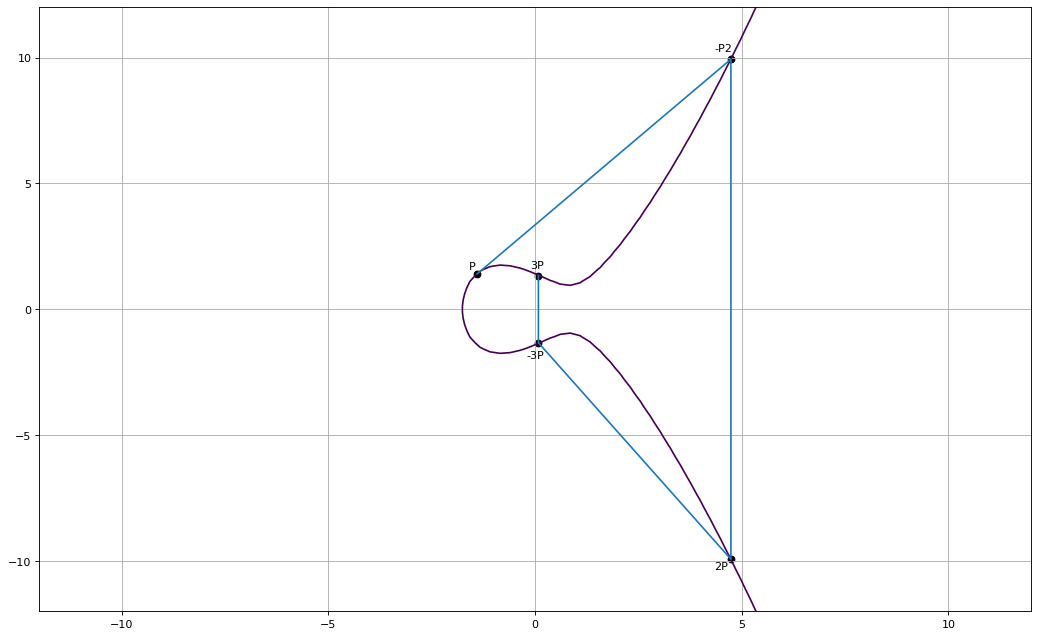

In [5]:
plt.figure(figsize=(16,10), dpi=80)

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

plt.scatter(Px, Py, color="black")
plt.annotate("P", [Px-.2, Py+.2])

plt.scatter(P2x, -P2y, color="black")
plt.annotate("-P2", [P2x-.4, -P2y+.3])
plt.scatter(P2x, P2y, color="black")
plt.annotate("2P", [P2x-.4, P2y-.4])

P3x, P3y = add(Px, Py, P2x, P2y)
plt.scatter(P3x, -P3y, color="black")
plt.annotate("-3P", [P3x-.3, -P3y-.6])
plt.scatter(P3x, P3y, color="black")
plt.annotate("3P", [P3x-.2, P3y+.3])

plt.plot([Px,P2x,P2x,P3x,P3x], [Py,-P2y,P2y,-P3y,P3y])

plt.grid()
plt.show()

Here, we used the same technique we used to add `P` and `Q` to add `P` and `2P`; that is, draw a straight line between `P` and `2P`, find the point of intersection with the curve (`-3P`), and take its additive inverse, which is `3P`. That is, `P + 2P = 3P`.

Having established the rules for addition on an elliptic curve, we now have the tools to implement a one-way function that allows us to use the elliptic curve in a cryptographic scheme.

### The Discrete Logarithm Problem
The discrete logarithm problem, as conceived by Diffie and Hellman, boils down to the difficulty of determining the value of an exponent given just its base, and the result of the exponent's application to this base. Algebraically, this translates to the question, what is the value of `y` in the congruence relation *`x`<sup>`y`</sup> <code>&Congruent;</code> `z (mod p)`*? Another way of asking this question is, how many times must `x` be multiplied to itself to produce `z`? (Note that *exponentiation* is really just another word for *repeated multiplication*.) It turns out this equation is very easy to compute in the *forward* direction&mdash;that is, given `x` and `y`, it is very easy to determine the value of `z`&mdash;but very hard to compute in the *reverse* direction; hence the origin of the term *one-way function*.

With elliptic curves we can pose an analogous question: Given a point `X`, how many times must you add the base point `P` to itself to reach `X`? Algebraically, this translates to the question, what is the value of `k` in the equation *`k x P = X`*, where `k` is the number of repeated additions of `P`? (Note here that *multiplication* is really just another word for *repeated addition*.) Whereas it is very easy to compute `X` given `k` and `P`, it turns out to be very difficult to compute `k` given `X` and `P`.

In cryptographic terms, `k` can be thought of as the private key, and `X` the public key. It is very easy for a user (say, Alice) to generate an elliptic&ndash;curve key pair `k` and `X`, publish `X` widely, and participate in a secure key exchange with another user (say, Bob). But it is very difficult for an eavesdropper (say, Eve) to recover `k` from the public parameters `X` and `P`.

The discerning reader may now wonder, why is it any more difficult for our adversary, Eve, to compute the private key `k`, given `X` and `P`, than it is for Alice to compute `X` given `k` and `P`? After all, Alice must perform `k` additions of `P` to compute `X`, which is exactly the same number of additions Eve must perform to compute `X`, thereby revealing the public key `k` to Eve.

### Double-and-Add
It turns out we've already seen the answer, and that answer lies in point doubling. Because Alice knows the value of `k`, she enjoys a crucial advantage over Eve. Let's say Alice has selected `k` using a cryptographically secure pseudo-random number generator (CSPRNG) from the interval *`1 < k < n`*, where `n` is the number of points on the curve. If we are using a cryptographically secure curve, this means that `k` will be an astronomically large number and, moreover, because it was generated by a CSPRNG, impossible for Eve to guess.

Alice's advantage is that her knowledge of `k` allows her to use a shortcut to compute `X` that Eve cannot use. By scanning the binary representation of `k` (i.e., its bit pattern), Alice simply doubles points (starting with the base point `P`) for every bit she sees, and adds `P` to the result if that bit happens to be `1`. For example, let's say `k = 26`, the binary representation for which is `11010`. Whereas Eve must perform 26 point additions to find `X`, Alice must perform only 6. Put another way, Eve's task must be performed in linear time, whereas Alice's can be performed in logarithmic time. If `k` is big enough, linear time won't cut it, and Eve won't even bother trying.

Let's put this to the test on our curve.

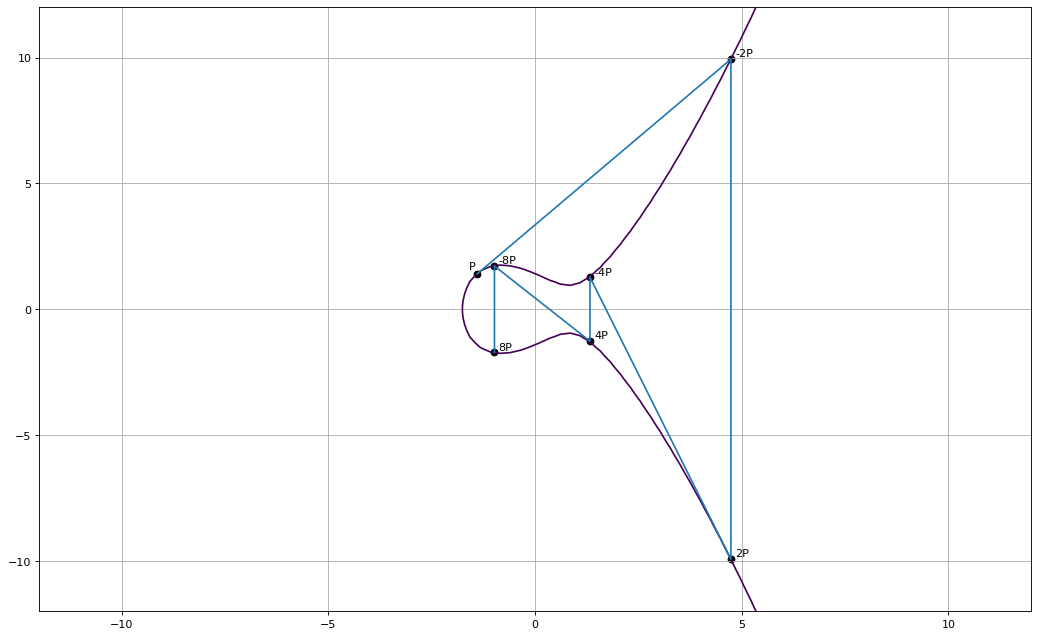

In [6]:
plt.figure(figsize=(16,10), dpi=80)

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

plt.scatter(Px, Py, color="black")
plt.annotate("P", [Px-.2, Py+.2])

xs, ys = [Px], [Py]
X, Y = Px, Py
for i in range(1,4):
    X, Y = double(X, Y, a)

    plt.scatter(X, -Y, color="black")
    plt.annotate(f"{-(1<<i)}P", [X+.1, -Y+.1])

    plt.scatter(X, Y, color="black")
    plt.annotate(f"{1<<i}P", [X+.1, Y+.1])

    xs.extend([X, X])
    ys.extend([-Y, Y])

plt.plot(xs, ys)

plt.grid()
plt.show()

Here, we've taken `log`<sub>`2`</sub>`8`, or `3`, steps to find the point at `8P`; it took 3 doubling operations to arrive at `8P`.

Now, let's compute `8P` using point addition.

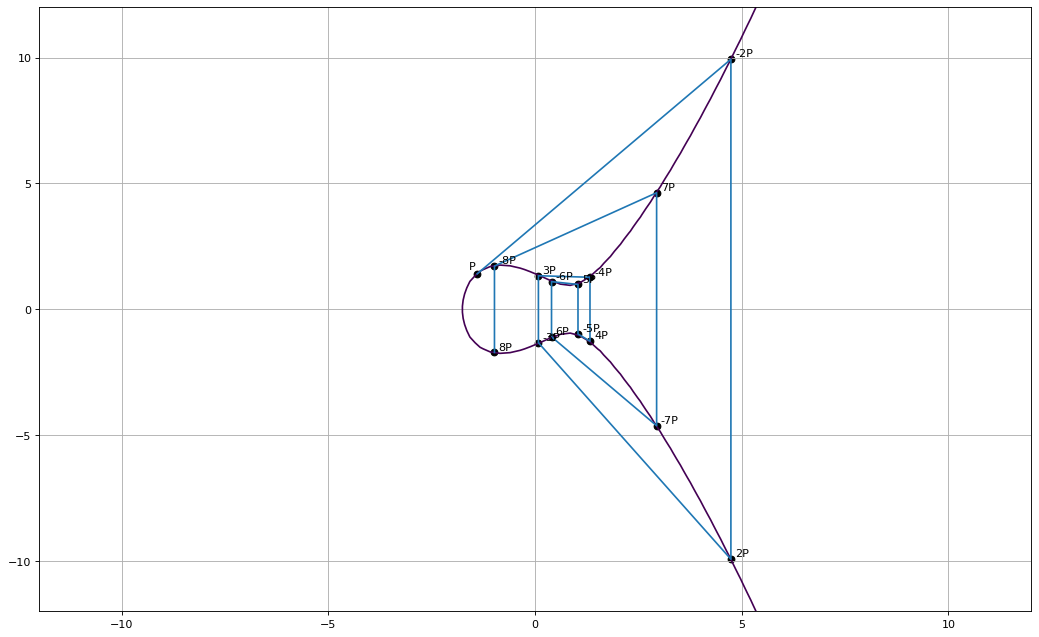

In [9]:
plt.figure(figsize=(16,10), dpi=80)

plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - a*x - b, [0])

plt.scatter(Px, Py, color="black")
plt.annotate("P", [Px-.2, Py+.2])

xs, ys = [Px], [Py]
X, Y = Px, Py
for i in range(1,8):
    if i == 1:
        X, Y = double(X, Y, a)
    else:
        X, Y = add(Px, Py, X, Y)

    plt.scatter(X, -Y, color="black")
    plt.annotate(f"{-(i+1)}P", [X+.1, -Y+.1])

    plt.scatter(X, Y, color="black")
    plt.annotate(f"{i+1}P", [X+.1, Y+.1])

    xs.extend([X, X])
    ys.extend([-Y, Y])

plt.plot(xs, ys)

plt.grid()
plt.show()

Here, we've arrived at the same point `8P` we did using 3 point&ndash;doubling operations; but, using point addition, it took us 8 operations to get there.

Of course, for this trivially small value of `k`, the time savings of 5 (8 minus 3) operations is trivial. But as the size of `k` increases, this savings grows exponentially. And, as we now know, in a real&ndash;world implementation `k` will be an unfathomably enormous number.

### An Elliptic Curve Over a Finite Field
For reasons mentioned at the outset, we have used elliptic curves over the real numbers throughout this demonstration. We also mentioned that the elliptic curves used in cryptography are over finite fields.

To conclude this demonstration, I thought it might be interesting to plot a curve over a finite field, just to see how it looks compared to the curves we've been working with. To do this I have used the code in the [ec.py](https://github.com/dchampion/crypto/blob/master/code/src/ec.py) module, which implements some of the elliptic curve primitives we have been discussing (note that although the code in this module may be of academic interest, it should not be used to secure sensitive data in real applications).

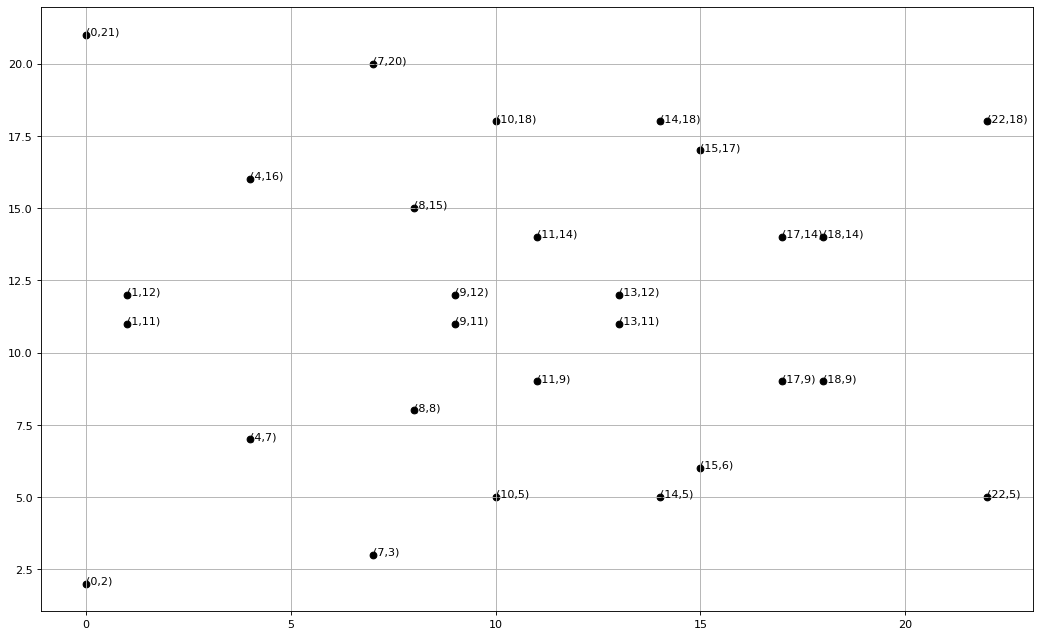

In [12]:
sys.path.append("../code/src")
import ec

plt.figure(figsize=(16,10), dpi=80)

np.ogrid[0:30:100j, 0:30:100j]

ec.new_curve(23,1,4,0,2,29,1,5)

pt = ec._G
plt.scatter(pt[0], pt[1], color="black")
plt.annotate(f"({pt[0]},{pt[1]})", [pt[0], pt[1]])

while pt != ec._i:
    pt = ec.add(ec._G, pt)
    plt.scatter(pt[0], pt[1], color="black")
    if pt != ec._i:
        plt.annotate(f"({pt[0]},{pt[1]})", [pt[0], pt[1]])

plt.grid()
plt.show()

The most obvious thing to note is that there's no *curve* there, at least not in the geometric sense we've seen thus far.

Algebraically, however, this is still very much an elliptic curve. Recall that the equation for an elliptic curve over the real numbers is *`y`<sup>`2`</sup>` = x`<sup>`3`</sup>` + ax + b`*. But, for an elliptic curve over a finite field, the equation is *`y`<sup>`2`</sup> <code>&Congruent;</code> `x`<sup>`3`</sup>` + ax + b (mod p)`*.

Note here that we have a *congruence relation* (denoted by the symbol <code>&Congruent;</code>), not an equation. Further note that all terms in the relation are taken modulo `p`, which is the operation that confines our curve points to a finite (integer) field. In this case that field is just 29 points (this is what is called the *order* of the curve). In a cryptographically strong curve, its order would be a very large number; say some 80 decimal digits in length. Finally, I've annotated each point in the curve with its `xy` coordinates; these too are integers, which themselves are confined to the interval *`0 <= x|y < p`*, where `p` is the modulus.

As can be seen here, geometrically, elliptic curves over finite fields could not be more different from those over the real numbers. Algebraically, however, they behave exacly the same. And that is why examining elliptic curves of the real&ndash;number variety can be such a useful exercise.